
## Impact of COVID19 on Mobility to Various Public Places





### Team Members

- Shiva Sai Praneeth Chakinala - 801147603
- Chaitanya Kintali - 801097831
- Prashanth Minkuri - 801166901
- Pranitha Amrutha Veldanda - 801166969

### Project Introduction


The project focuses on performing Exploratory Data Analysis on the Community Mobility Reports data provided by Google during the pandemic period.We analyse how the mobility of people to various popular public places has changed with respect to number of covid cases registered. We will try to extract various insights such as how the visits and duration of stay at different places changed compared to a baseline. The baseline is considered as the median value for the corresponding day of the 5- week period duration Jan 3–Feb 6, 2020.



## Data Preparation

### Introduction of Data

We are performing our research on the data provided by Google that is collected from users who have opted-in to Location History for their Google Account.We are also using data provided by CDC for daily number of COVID Positive cases. We will combine both the datasets in order to perform anaylse on different mobility trends with respect to COVID positive cases.

In [1]:
import numpy as np
import pandas as pd

df_mobility = pd.read_csv('mobility.csv')
df_cases = pd.read_csv('cases_cleaned.csv')

In [2]:
print("shape of mobility dataset",df_mobility.shape)
print("shape of cases dataset",df_cases.shape)

shape of mobility dataset (705059, 14)
shape of cases dataset (14280, 16)


- Dataset 'mobility' comprises of 14280 observations and 14 features.
- Dataset 'cases' comprises of 14280 observations and 16 features.

In [3]:
# Prints the top 5 rows of the mobility dataset
df_mobility.head(5)

,country_code,country_region,state,county,metro_area,iso_code,census_fips_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,US,United States,NaN,NaN,NaN,NaN,NaN,2/15/20,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2/16/20,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2/17/20,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2/18/20,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2/19/20,2.0,0.0,8.0,1.0,1.0,0.0


In [4]:
# Prints the top 5 rows of the cases dataset
df_cases.head(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,total_tests
0,2/15/20,AK,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,3/26/20 16:22,NaN,NaN,0.0
1,2/16/20,AK,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,3/26/20 16:22,NaN,NaN,0.0
2,2/17/20,AK,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,3/26/20 16:22,NaN,NaN,0.0
3,2/18/20,AK,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,3/26/20 16:22,NaN,NaN,0.0
4,2/19/20,AK,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,3/26/20 16:22,NaN,NaN,0.0


List of columns of cases and mobility datasets

In [5]:
df_cases.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths', 'total_tests'],
      dtype='object')

In [6]:
df_mobility.columns

Index(['country_code', 'country_region', 'state', 'county', 'metro_area',
       'iso_code', 'census_fips_code', 'date', 'retail_and_recreation',
       'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces',
       'residential'],
      dtype='object')

In [7]:
df_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705059 entries, 0 to 705058
Data columns (total 14 columns):
country_code             705059 non-null object
country_region           705059 non-null object
state                    704779 non-null object
county                   690499 non-null object
metro_area               0 non-null float64
iso_code                 14280 non-null object
census_fips_code         690779 non-null float64
date                     705059 non-null object
retail_and_recreation    472245 non-null float64
grocery_and_pharmacy     430213 non-null float64
parks                    164094 non-null float64
transit_stations         267170 non-null float64
workplaces               681965 non-null float64
residential              368197 non-null float64
dtypes: float64(8), object(6)
memory usage: 75.3+ MB


In [8]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280 entries, 0 to 14279
Data columns (total 16 columns):
submission_date    14280 non-null object
state              14280 non-null object
tot_cases          14268 non-null float64
conf_cases         5947 non-null float64
prob_cases         5947 non-null float64
new_case           14263 non-null float64
pnew_case          11157 non-null float64
tot_death          14262 non-null float64
conf_death         6327 non-null float64
prob_death         6327 non-null float64
new_death          14262 non-null float64
pnew_death         11065 non-null float64
created_at         14262 non-null object
consent_cases      12022 non-null object
consent_deaths     12302 non-null object
total_tests        13988 non-null float64
dtypes: float64(11), object(5)
memory usage: 1.7+ MB


From the below describe() tables,we can observe mean, maximum and minimum values for mobility and cases of different places.We can also observe that maximum mobility is observed in the parks and minimum in retail_and_recreation

In [9]:
df_mobility.describe().T

,count,mean,std,min,25%,50%,75%,max
metro_area,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
census_fips_code,690779.0,30360.220888,15298.555620,1001.0,18105.0,29115.0,45051.0,56045.0
retail_and_recreation,472245.0,-9.171085,19.899894,-100.0,-20.0,-8.0,3.0,261.0
grocery_and_pharmacy,430213.0,1.659287,14.387482,-96.0,-7.0,1.0,9.0,225.0
parks,164094.0,34.829110,64.904962,-95.0,-9.0,21.0,65.0,709.0
transit_stations,267170.0,-11.204158,25.991175,-92.0,-29.0,-9.0,6.0,252.0
workplaces,681965.0,-22.663597,14.625218,-92.0,-32.0,-23.0,-14.0,66.0
residential,368197.0,7.411516,6.098827,-46.0,3.0,6.0,11.0,38.0


In [10]:
df_cases.describe().T

,count,mean,std,min,25%,50%,75%,max
tot_cases,14268.0,70649.603448,1.298176e+05,0.0,2475.75,20795.5,87691.0,1072698.0
conf_cases,5947.0,72553.584496,8.098506e+04,0.0,11651.00,44642.0,108785.0,634395.0
prob_cases,5947.0,3659.072810,5.599577e+03,0.0,129.50,1252.0,4829.5,41184.0
new_case,14263.0,805.884246,1.489443e+03,-10427.0,37.00,297.0,910.5,17844.0
pnew_case,11157.0,46.488931,1.974092e+02,-6259.0,0.00,0.0,23.0,5014.0
tot_death,14262.0,2035.965082,3.381592e+03,0.0,58.00,547.0,2420.0,20296.0
conf_death,6327.0,2614.613877,3.040045e+03,0.0,449.50,1552.0,3566.0,14900.0
prob_death,6327.0,156.958116,3.206120e+02,0.0,0.00,38.0,207.0,5482.0
new_death,14262.0,16.004628,4.561464e+01,-1824.0,0.00,4.0,16.0,2185.0
pnew_death,11065.0,0.922368,7.992104e+01,-5482.0,0.00,0.0,0.0,5482.0


## Basic Data cleaning

### Dealing with Data types

We have 2 different datatypes in our datasets which are :
- Numeric, 
- Categorical

We convert datatype of date column to datetype so that we can use that column to filter the data based on the datetime values of the dataset.

In [11]:
df_mobility['date']= pd.to_datetime(df_mobility['date'])

df_cases['submission_date']= pd.to_datetime(df_cases['submission_date'])

In [12]:
print(df_mobility.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705059 entries, 0 to 705058
Data columns (total 14 columns):
country_code             705059 non-null object
country_region           705059 non-null object
state                    704779 non-null object
county                   690499 non-null object
metro_area               0 non-null float64
iso_code                 14280 non-null object
census_fips_code         690779 non-null float64
date                     705059 non-null datetime64[ns]
retail_and_recreation    472245 non-null float64
grocery_and_pharmacy     430213 non-null float64
parks                    164094 non-null float64
transit_stations         267170 non-null float64
workplaces               681965 non-null float64
residential              368197 non-null float64
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 75.3+ MB
None


We can observe that datatype of date columns has been changed to datetime.

### Feature Selection


Our dataset 'mobility' contains the values corresponding to each county within state. We are primarily focusing on analysing the state wise trends. Hence we are dropping all the rows corresponding to the each county.



In [13]:
df_mobility=df_mobility[df_mobility.state.notnull()]
df_mobility=df_mobility[df_mobility.county.isnull()]
df_mobility.drop(['county', 'metro_area','census_fips_code','country_code','country_region'], axis = 1,inplace=True)

We create a new column 'cases_percent' and store the values by computing percentage of COVID positive cases using the columns 'New_cases' and 'Total_tests'

In [14]:
df_cases["cases_percent"]=(df_cases['new_case']*100)/df_cases['total_tests']

In [15]:
#checking if the new column 'cases_percent' has been added to df_cases
df_cases.tail()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,total_tests,cases_percent
14275,2020-11-16,WY,23193.0,19885.0,3308.0,699.0,112.0,144.0,144.0,0.0,0.0,0.0,11/17/20 14:52,Agree,Agree,357020.0,0.195787
14276,2020-11-17,WY,24453.0,21047.0,3406.0,1260.0,98.0,155.0,155.0,0.0,11.0,0.0,11/18/20 14:57,Agree,Agree,363992.0,0.346161
14277,2020-11-18,WY,25275.0,21750.0,3525.0,822.0,119.0,155.0,155.0,0.0,0.0,0.0,11/19/20 15:01,Agree,Agree,369292.0,0.222588
14278,2020-11-19,WY,26169.0,22489.0,3680.0,894.0,155.0,176.0,176.0,0.0,21.0,0.0,11/20/20 15:06,Agree,Agree,376123.0,0.237688
14279,2020-11-20,WY,27129.0,23347.0,3782.0,960.0,102.0,176.0,176.0,0.0,0.0,0.0,11/21/20 14:59,Agree,Agree,380669.0,0.252188


### Handling missing data

We have few null values in the columns 'parks' and 'transit_stations'. We will replaces those values with zeros so that we can caluclate accurate trends of the mobility to those category of places


In [16]:
df_mobility.isnull().sum().sort_values(ascending=False)

parks                    444
transit_stations         135
residential                0
workplaces                 0
grocery_and_pharmacy       0
retail_and_recreation      0
date                       0
iso_code                   0
state                      0
dtype: int64

In [17]:
df_mobility['parks']= df_mobility['parks'].fillna(0)
df_mobility['transit_stations']= df_mobility['transit_stations'].fillna(0)

In [18]:
df_mobility.isnull().sum().sort_values(ascending=False)

residential              0
workplaces               0
transit_stations         0
parks                    0
grocery_and_pharmacy     0
retail_and_recreation    0
date                     0
iso_code                 0
state                    0
dtype: int64

Dataset "cases" contains null values, we will drop those columns which have large number of null values and replace other null values with zeros.

In [19]:
df_cases.isnull().sum().sort_values(ascending=False)

conf_cases         8333
prob_cases         8333
conf_death         7953
prob_death         7953
pnew_death         3215
pnew_case          3123
consent_cases      2258
consent_deaths     1978
cases_percent      1181
total_tests         292
tot_death            18
new_death            18
created_at           18
new_case             17
tot_cases            12
state                 0
submission_date       0
dtype: int64

In [20]:
df_cases.drop(['prob_cases','created_at', 'conf_cases','prob_death','conf_death','pnew_death','pnew_case','pnew_case','consent_cases','consent_deaths'], axis = 1,inplace=True)

In [21]:
df_cases['new_death']= df_cases['new_death'].fillna(0)
df_cases['tot_death']= df_cases['tot_death'].fillna(0)
df_cases['new_case']= df_cases['new_case'].fillna(0)
df_cases['tot_cases']= df_cases['tot_cases'].fillna(0)
df_cases['cases_percent']= df_cases['tot_cases'].fillna(0)
df_cases['total_tests']= df_cases['tot_cases'].fillna(0)

In [22]:
df_cases.isnull().sum().sort_values(ascending=False)

cases_percent      0
total_tests        0
new_death          0
tot_death          0
new_case           0
tot_cases          0
state              0
submission_date    0
dtype: int64

Checking if both datasets have same number of rows

In [23]:
df_mobility.shape

(14280, 9)

In [24]:
df_cases.shape

(14280, 8)

Saving the cleaned dataset into seperate file

In [25]:
df_mobility.to_csv('mobility_cleaned.csv',header=True,index=False)
df_mobility= pd.read_csv('mobility_cleaned.csv')
df_mobility['date']=pd.to_datetime(df_mobility['date'])

### Merging columns of both datasets



In [26]:
df_cases['submission_date']= pd.to_datetime(df_cases['submission_date'])

states_mobility=df_mobility.iso_code.unique()
df_cases1 = pd.DataFrame()

for  stat in states_mobility:
    df_cases1=df_cases1.append(df_cases[(df_cases['submission_date'] >= '2/15/20') & (df_cases['submission_date'] <= '11/20/20') & (df_cases['state']==stat)])


In [27]:
df_cases1.shape
df_cases1['submission_date']= pd.to_datetime(df_cases1['submission_date'])

In [28]:
df_cases1 = df_cases1.sort_values(by = 'state') 
df_mobility = df_mobility.sort_values(by = 'state') 
df_cases.tail()

,submission_date,state,tot_cases,new_case,tot_death,new_death,total_tests,cases_percent
14275,2020-11-16,WY,23193.0,699.0,144.0,0.0,23193.0,23193.0
14276,2020-11-17,WY,24453.0,1260.0,155.0,11.0,24453.0,24453.0
14277,2020-11-18,WY,25275.0,822.0,155.0,0.0,25275.0,25275.0
14278,2020-11-19,WY,26169.0,894.0,176.0,21.0,26169.0,26169.0
14279,2020-11-20,WY,27129.0,960.0,176.0,0.0,27129.0,27129.0


In [29]:
df_mobility.head()

,state,iso_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Alabama,AL,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
177,Alabama,AL,2020-08-10,-7.0,-1.0,30.0,-3.0,-30.0,7.0
178,Alabama,AL,2020-08-11,-8.0,0.0,24.0,-5.0,-29.0,8.0
179,Alabama,AL,2020-08-12,-5.0,0.0,36.0,-2.0,-30.0,7.0
180,Alabama,AL,2020-08-13,-10.0,0.0,24.0,-3.0,-29.0,8.0


#### Adding the columns 'new_case', 'cases_percent' of df_cases1 to df_mobility dataset

In [30]:
df_mobility['cases']=df_cases1['new_case']
df_mobility['cases_percent']=df_cases1['cases_percent']

In [31]:
df_mobility.tail()

,state,iso_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,cases,cases_percent
14090,Wyoming,WY,2020-05-15,-13.0,4.0,52.0,12.0,-27.0,10.0,15.0,716.0
14089,Wyoming,WY,2020-05-14,-13.0,4.0,47.0,4.0,-29.0,10.0,13.0,701.0
14088,Wyoming,WY,2020-05-13,-12.0,6.0,47.0,4.0,-28.0,10.0,13.0,688.0
14094,Wyoming,WY,2020-05-19,0.0,9.0,96.0,9.0,-25.0,8.0,10.0,776.0
14279,Wyoming,WY,2020-11-20,-21.0,-6.0,1.0,7.0,-17.0,8.0,960.0,27129.0


### Exploratory Data Analysis


#### Summarising the mobility trends of different place categories accross all the US States.

In [105]:
df=pd.DataFrame()

df['transit_stations']=df_mobility.groupby(['iso_code'])['transit_stations'].mean()
df['parks']=df_mobility.groupby(['iso_code'])['parks'].mean()
df['retail_and_recreation']=df_mobility.groupby(['iso_code'])['parks'].mean()
df['workplaces']=df_mobility.groupby(['iso_code'])['workplaces'].mean()
df['grocery_and_pharmacy']=df_mobility.groupby(['iso_code'])['grocery_and_pharmacy'].mean()
df['retail_and_recreation']=df_mobility.groupby(['iso_code'])['retail_and_recreation'].mean()
df['cases']=df_mobility.groupby(['iso_code'])['cases'].mean()
df['total cases']=df_mobility.groupby(['iso_code'])['cases'].sum()

state=df_mobility['iso_code'].unique()

df['state']=sorted(state)

sum1=df['cases'].sum()
df['cases']=df['cases']*1000/sum1

df = df.sort_values(by = 'cases')
df

,transit_stations,parks,retail_and_recreation,workplaces,grocery_and_pharmacy,cases,total cases,state
iso_code,,,,,,,,
VA,-30.153571,50.550000,-17.635714,-30.864286,-3.353571,0.300844,3458.0,VA
MA,-46.492857,54.614286,-22.007143,-35.114286,-9.478571,0.880695,10123.0,MA
HI,-55.032143,-42.217857,-36.150000,-33.357143,-20.139286,1.458633,16766.0,HI
NJ,-40.653571,75.450000,-25.910714,-34.314286,-5.339286,1.461330,16797.0,NJ
DE,-25.539286,34.439286,-12.110714,-28.135714,-2.889286,1.723285,19808.0,DE
AL,-5.625000,28.303571,-11.550000,-23.182143,0.421429,2.207089,25369.0,AL
WY,17.896429,103.396429,-3.189286,-19.692857,12.564286,2.360208,27129.0,WY
DC,-60.321429,-32.782143,-46.739286,-46.903571,-20.114286,2.680975,30816.0,DC
WI,-12.821429,131.017857,-14.978571,-24.317857,0.914286,3.347738,38480.0,WI


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transit_stations,51.0,-19.799370,17.164535,-60.321429,-31.376786,-20.946429,-5.451786,17.896429
parks,51.0,58.381092,44.826679,-42.217857,28.953571,64.282143,89.301786,148.914286
retail_and_recreation,51.0,-15.040126,8.384639,-46.739286,-17.925000,-14.728571,-9.507143,-2.257143
workplaces,51.0,-27.609384,5.147570,-46.903571,-30.162500,-28.135714,-23.596429,-19.453571
grocery_and_pharmacy,51.0,-1.336485,6.935471,-20.139286,-4.785714,-1.435714,1.860714,16.617857
cases,51.0,19.607843,20.736153,0.300844,6.203495,15.268837,25.475828,93.324124


From the above table we can observe  following 

- Mobility has dropped to a greater extent to places such as workplaces , transit_stations and retail_and_recreation. 
- Mbility has increased very much to parks.
- There is no significant difference in the mobility to grocery and pharmacy stores.

#### Heatmap showing correlation between columns of mobility dataset

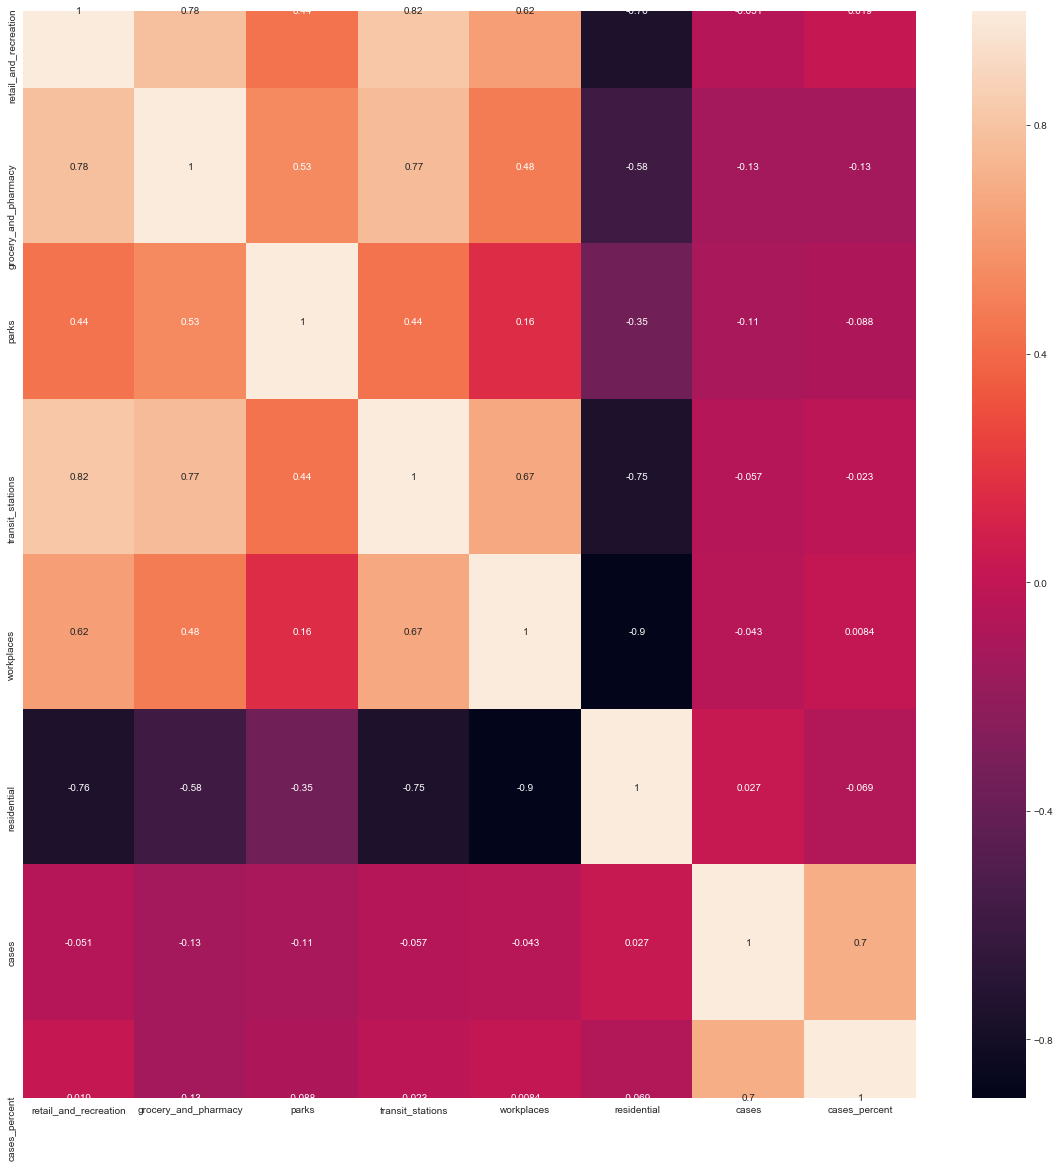

In [50]:
import seaborn as sns
import matplotlib as pl
import matplotlib.pyplot as plt


correlation=df_mobility.corr()
plt.figure(figsize=(20,20))
plt.savefig('Heatmap.png')
sns_plot=sns.heatmap(correlation,annot=True)
#plt.savefig("output.png")
plt.show()

### Histograms on different columns of cases dataset

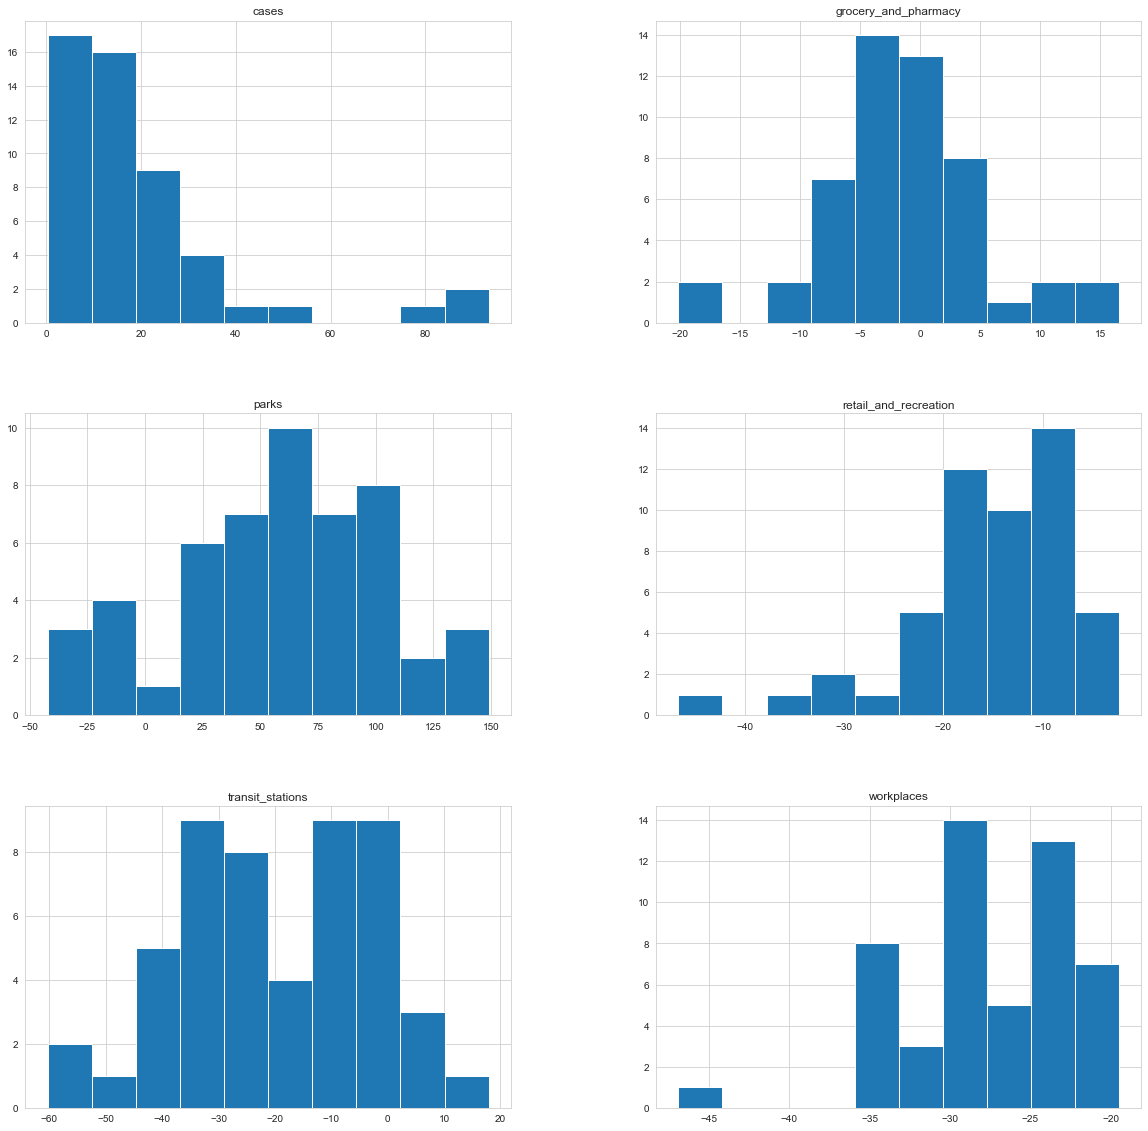

In [44]:
sns.set_style("whitegrid");
num=df.select_dtypes(include=['int64','float64'])
num.hist(figsize=(20, 20))
#plt.savefig('Histograms.png')
plt.show() 



### Outlier Detection

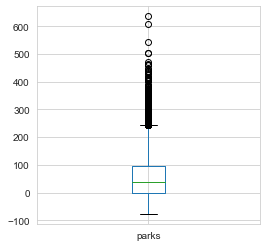

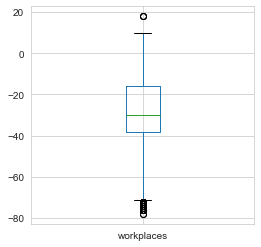

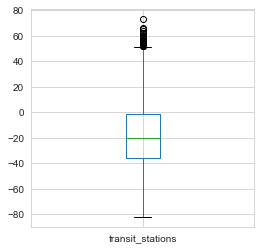

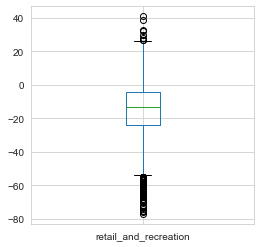

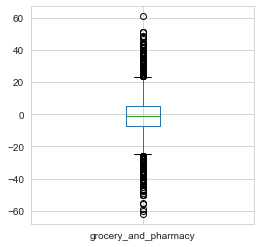

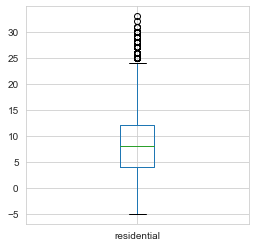

In [49]:
columns = ['parks',
       'workplaces','transit_stations','retail_and_recreation','grocery_and_pharmacy','residential']
for i in columns:
    df_mobility[str(i)].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(4,4))
    plt.savefig(i+'.png')
    plt.show()
    

We can observe that there are outliers in every category of places.

In [121]:
df_bottom=df.head(10)

In [122]:
df_bottom

,transit_stations,parks,retail_and_recreation,workplaces,grocery_and_pharmacy,cases,total cases,state
iso_code,,,,,,,,
VA,-30.153571,50.550000,-17.635714,-30.864286,-3.353571,0.300844,3458.0,VA
MA,-46.492857,54.614286,-22.007143,-35.114286,-9.478571,0.880695,10123.0,MA
HI,-55.032143,-42.217857,-36.150000,-33.357143,-20.139286,1.458633,16766.0,HI
NJ,-40.653571,75.450000,-25.910714,-34.314286,-5.339286,1.461330,16797.0,NJ
DE,-25.539286,34.439286,-12.110714,-28.135714,-2.889286,1.723285,19808.0,DE
AL,-5.625000,28.303571,-11.550000,-23.182143,0.421429,2.207089,25369.0,AL
WY,17.896429,103.396429,-3.189286,-19.692857,12.564286,2.360208,27129.0,WY
DC,-60.321429,-32.782143,-46.739286,-46.903571,-20.114286,2.680975,30816.0,DC
WI,-12.821429,131.017857,-14.978571,-24.317857,0.914286,3.347738,38480.0,WI


In [123]:
df_top=df.tail(10)
df_top

,transit_stations,parks,retail_and_recreation,workplaces,grocery_and_pharmacy,cases,total cases,state
iso_code,,,,,,,,
MI,-20.946429,133.728571,-16.267857,-29.871429,-3.078571,27.942567,321181.0,MI
NE,-1.032143,80.925000,-10.275000,-23.021429,2.300000,28.609417,328846.0,NE
TN,-12.910714,56.550000,-9.785714,-24.400000,1.200000,28.843098,331532.0,TN
OH,-9.553571,113.939286,-12.967857,-26.092857,-1.103571,29.181613,335423.0,OH
WV,0.478571,46.428571,-9.185714,-22.957143,1.421429,31.771325,365190.0,WV
GA,-30.785714,26.900000,-14.910714,-28.607143,-3.707143,38.331170,440591.0,GA
IN,-3.046429,105.496429,-9.000000,-24.350000,0.800000,55.191835,634393.0,IN
FL,-38.914286,-23.171429,-23.971429,-29.232143,-11.925000,79.175144,910065.0,FL
CA,-38.417857,-6.525000,-29.971429,-33.532143,-8.417857,93.286366,1072264.0,CA


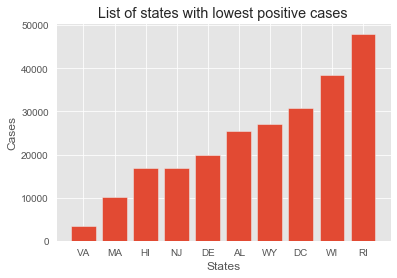

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')



plt.bar(df_bottom['state'], df_bottom['total cases'])
plt.xlabel("States")
plt.ylabel("Cases")
plt.title("List of states with lowest positive cases")

plt.savefig('low.png')

plt.show()

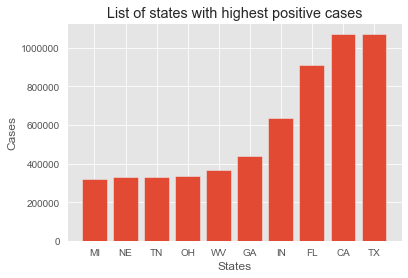

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')



plt.bar(df_top['state'], df_top['total cases'])
plt.xlabel("States")
plt.ylabel("Cases")
plt.title("List of states with highest positive cases")

plt.savefig('top.png')

plt.show()